In [ ]:
# Copyright 2022 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Forecasting retail demand with Vertex AI and BigQuery ML 

<table align="left">

  <td>
    <a href="https://colab.research.google.com/github/GoogleCloudPlatform/vertex-ai-samples/blob/main/notebooks/official/workbench/demand_forecasting/forecasting-retail-demand.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/colab-logo-32px.png" alt="Colab logo"> Run in Colab
    </a>
  </td>
  <td>
    <a href="https://github.com/GoogleCloudPlatform/vertex-ai-samples/blob/main/notebooks/official/workbench/demand_forecasting/forecasting-retail-demand.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/github-logo-32px.png" alt="GitHub logo">
      View on GitHub
    </a>
  </td>
  <td>
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://github.com/GoogleCloudPlatform/vertex-ai-samples/blob/main/notebooks/official/workbench/demand_forecasting/forecasting-retail-demand.ipynb">
      <img src="https://lh3.googleusercontent.com/UiNooY4LUgW_oTvpsNhPpQzsstV5W8F7rYgxgGBD85cWJoLmrOzhVs_ksK_vgx40SHs7jCqkTkCk=e14-rj-sc0xffffff-h130-w32" alt="Vertex AI logo">
      Open in Vertex AI Workbench
    </a>
  </td>                                                                                               
</table>

## Table of contents

* [Overview](#section-1)
* [Dataset](#section-2)
* [Objective](#section-3)
* [Costs](#section-4)
* [Explore the data](#section-5)
* [Modeling with BigQuery and the ARIMA model](#section-6)
* [Evaluate the model](#section-7)
* [Executor](#section-8)
* [Clean up](#section-9)


## Overview 
<a name="section-1"></a>

This tutorial explores demand forecasting using a BigQuery public retail dataset. Being able to measure and forecast customer demand can help retailers better understand their customers, stock shelves with the right products, offer targeted promotions, and generally, better plan and manage their budgets. This notebook applies an ARIMA (Autoregressive integrated moving average) model from BigQuery ML on retail data. This notebook demonstrates how to train and evaluate a BigQuery ML model for demand forecasting datasets and extract actionable future insights.

*Note: This notebook file was designed to run in a [Vertex AI Workbench managed notebooks](https://cloud.google.com/vertex-ai/docs/workbench/managed/create-instance) instance using the `Python (Local)` kernel. Some components of this notebook may not work in other notebook environments.*

#### ARIMA Modeling with BigQuery ML 

The <a href='https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average'>ARIMA model</a> is designed to analyze historical data, spot patterns over time, and project them into the future--in other words, forecasting. The model is available inside BigQuery ML and enables users to create and execute machine learning models directly in BigQuery using SQL queries. Working with BigQuery ML is advantageous, as it already has access to the data, it can handle most of the modeling details automatically if desired, and will store both the model and any predictions also inside BigQuery. 

## Dataset 
<a name="section-2"></a>

This notebook uses the BigQuery public retail data set.
The data covers 10 US stores and includes item level, department, product categories, and store details. In addition, it has explanatory variables such as price and gross margin. 


## Objective
<a name="section-3"></a>

In this tutorial, you will:

* Explore data
* Model with BigQuery and the ARIMA model
* Evaluate the model
* Evaluate the model results using BigQuery ML (on training data)
* Evalute the model results - MAE, MAPE, MSE, RMSE (on test data)
* Use the executor feature

## Costs
<a name="section-4"></a>
This tutorial uses the following billable components of Google Cloud:

* Vertex AI
* BigQuery

Learn about [Vertex AI
pricing](https://cloud.google.com/vertex-ai/pricing), [BigQuery
pricing](https://cloud.google.com/bigquery/pricing) and use the [Pricing
Calculator](https://cloud.google.com/products/calculator/)
to generate a cost estimate based on your projected usage.

### Set up your local development environment

**If you are using Colab or Google Cloud Notebooks**, your environment already meets
all the requirements to run this notebook. You can skip this step.

**Otherwise**, make sure your environment meets this notebook's requirements.
You need the following:

* The Google Cloud SDK
* Git
* Python 3
* virtualenv
* Jupyter notebook running in a virtual environment with Python 3

The Google Cloud guide to [Setting up a Python development
environment](https://cloud.google.com/python/setup) and the [Jupyter
installation guide](https://jupyter.org/install) provide detailed instructions
for meeting these requirements. The following steps provide a condensed set of
instructions:

1. [Install and initialize the Cloud SDK.](https://cloud.google.com/sdk/docs/)

1. [Install Python 3.](https://cloud.google.com/python/setup#installing_python)

1. [Install
   virtualenv](https://cloud.google.com/python/setup#installing_and_using_virtualenv)
   and create a virtual environment that uses Python 3. Activate the virtual environment.

1. To install Jupyter, run `pip3 install jupyter` on the
command-line in a terminal shell.

1. To launch Jupyter, run `jupyter notebook` on the command-line in a terminal shell.

1. Open this notebook in the Jupyter Notebook Dashboard.

### Install additional packages


In [1]:
import os

# The Google Cloud Notebook product has specific requirements
IS_GOOGLE_CLOUD_NOTEBOOK = os.path.exists("/opt/deeplearning/metadata/env_version")

# Google Cloud Notebook requires dependencies to be installed with '--user'
USER_FLAG = ""
if IS_GOOGLE_CLOUD_NOTEBOOK:
    USER_FLAG = "--user"

In [2]:
! pip3 install {USER_FLAG} --upgrade pandas-gbq 'google-cloud-bigquery[bqstorage,pandas]' sklearn 


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.9/211.9 kB 12.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=cb140ade321df8d1361587c17024a6eed70fa245290227601cd33d845d0e87e6
  Stored in directory: /home/jupyter/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-aiplatform 1.16.0 requires google-cloud-bigquery<3.0.0dev,>=1.15.0, but you have google-cloud-bigquery 3.3.0 which is incompatible.


### Restart the kernel

After you install the additional packages, you need to restart the notebook kernel so it can find the packages.

In [80]:
# Automatically restart kernel after installs
import os

if not os.getenv("IS_TESTING"):
    # Automatically restart kernel after installs
    import IPython

    app = IPython.Application.instance()
    app.kernel.do_shutdown(True)

## Before you begin

### Set up your Google Cloud project

**The following steps are required, regardless of your notebook environment.**

1. [Select or create a Google Cloud project](https://console.cloud.google.com/cloud-resource-manager). When you first create an account, you get a $300 free credit towards your compute/storage costs.

1. [Make sure that billing is enabled for your project](https://cloud.google.com/billing/docs/how-to/modify-project).

1. [Enable the Vertex AI, Cloud Storage, and Compute Engine APIs](https://console.cloud.google.com/flows/enableapi?apiid=aiplatform.googleapis.com,compute_component,storage-component.googleapis.com). 

1. [Configure your Google Cloud project for Vertex Pipelines](https://cloud.google.com/vertex-ai/docs/pipelines/configure-project).

1. If you are running this notebook locally, you will need to install the [Cloud SDK](https://cloud.google.com/sdk).

1. Enter your project ID in the cell below. Then run the cell to make sure the
Cloud SDK uses the right project for all the commands in this notebook.

**Note**: Jupyter runs lines prefixed with `!` as shell commands, and it interpolates Python variables prefixed with `$` into these commands.

#### Set your project ID

**If you don't know your project ID**, you may be able to get your project ID using `gcloud`.

In [2]:
import os

PROJECT_ID = ""

# Get your Google Cloud project ID from gcloud
if not os.getenv("IS_TESTING"):
    shell_output = !gcloud config list --format 'value(core.project)' 2>/dev/null
    PROJECT_ID = shell_output[0]
    print("Project ID: ", PROJECT_ID)

Project ID:  vertex-ai-dev


Otherwise, set your project ID here.

In [3]:
if PROJECT_ID == "" or PROJECT_ID is None:
    PROJECT_ID = "[your-project-id]"  # @param {type:"string"}

#### Timestamp

If you are in a live tutorial session, you might be using a shared test account or project. To avoid name collisions between users on resources created, you create a timestamp for each instance session, and append it onto the name of resources you create in this tutorial.

In [4]:
from datetime import datetime

TIMESTAMP = datetime.now().strftime("%Y%m%d%H%M%S")

### Authenticate your Google Cloud account

**If you are using Google Cloud Notebooks**, your environment is already
authenticated. Skip this step.

**If you are using Colab**, run the cell below and follow the instructions
when prompted to authenticate your account via oAuth.

**Otherwise**, follow these steps:

1. In the Cloud Console, go to the [**Create service account key**
   page](https://console.cloud.google.com/apis/credentials/serviceaccountkey).

2. Click **Create service account**.

3. In the **Service account name** field, enter a name, and
   click **Create**.

4. In the **Grant this service account access to project** section, click the **Role** drop-down list. Type "Vertex AI"
into the filter box, and select
   **Vertex AI Administrator**. Type "Storage Object Admin" into the filter box, and select **Storage Object Admin**.

5. Click *Create*. A JSON file that contains your key downloads to your
local environment.

6. Enter the path to your service account key as the
`GOOGLE_APPLICATION_CREDENTIALS` variable in the cell below and run the cell.

In [ ]:
import os
import sys

# If you are running this notebook in Colab, run this cell and follow the
# instructions to authenticate your GCP account. This provides access to your
# Cloud Storage bucket and lets you submit training jobs and prediction
# requests.

# The Google Cloud Notebook product has specific requirements
IS_GOOGLE_CLOUD_NOTEBOOK = os.path.exists("/opt/deeplearning/metadata/env_version")

# If on Google Cloud Notebooks, then don't execute this code
if not IS_GOOGLE_CLOUD_NOTEBOOK:
    if "google.colab" in sys.modules:
        from google.colab import auth as google_auth

        google_auth.authenticate_user()

    # If you are running this notebook locally, replace the string below with the
    # path to your service account key and run this cell to authenticate your GCP
    # account.
    elif not os.getenv("IS_TESTING"):
        %env GOOGLE_APPLICATION_CREDENTIALS ''

## Import libraries and define constants

Load the required libraries.

In [5]:
import datetime

import matplotlib.pyplot as plt
import pandas as pd
from google.cloud import bigquery
from google.cloud.bigquery import Client
from sklearn.metrics import (mean_absolute_error,
                             mean_absolute_percentage_error,
                             mean_squared_error)

%matplotlib inline

import warnings

warnings.filterwarnings("ignore")

In [6]:
SALES_TABLE = "training_data_table"

# Construct a BigQuery client object.

client = Client(project=PROJECT_ID)

Create a BigQuery datatset

In [7]:
dataset_id = "demandforecasting" + "_" + TIMESTAMP

If you are using ***Vertex AI Workbench managed notebooks instance***, every cell which starts with "#@bigquery" will be a SQL Query. If you are using Vertex AI Workbench user managed notebooks instance or Colab it will be a markdown cell.

#@bigquery
CREATE SCHEMA [your-dataset-id]
OPTIONS(
  location="us"
  )

(**Optional**)If you are using Vertex AI Workbench managed notebooks instance, once the results from BigQuery are displayed in the above cell, click the **Query and load as DataFrame** button and execute the generated code stub to fetch the data into the current notebook as a dataframe.

*Note: By default the data is loaded into a `df` variable, though this can be changed before executing the cell if required.*

In [8]:
query = """
CREATE SCHEMA `{PROJECT_ID}.{dataset_id}`
OPTIONS(
  location="us"
  )
""".format(
    PROJECT_ID=PROJECT_ID, dataset_id=dataset_id
)
query_job = client.query(query)
print(query_job.result())

## Explore the Data
<a name="section-5"></a>

View the data that is stored in the public BigQuery dataset.

#@bigquery
SELECT * FROM `looker-private-demo.retail.transaction_detail`

In [9]:
query = """
SELECT * FROM `looker-private-demo.retail.transaction_detail`
"""
query_job = client.query(query)

In [10]:
query_job.to_dataframe()

,transaction_timestamp,transaction_id,store_id,channel_id,customer_id,line_items
0,2019-05-01 01:32:37+00:00,158877,1,2,<NA>,"[{'product_id': 5130, 'sale_price': 29.9400005..."
1,2019-05-01 13:01:03+00:00,87580,1,1,<NA>,"[{'product_id': 18807, 'sale_price': 59.990001..."
2,2019-05-01 12:23:00+00:00,144415,1,2,<NA>,"[{'product_id': 17641, 'sale_price': 44.0, 'gr..."
3,2019-05-01 03:13:40+00:00,11320,1,3,11971,"[{'product_id': 12795, 'sale_price': 108.0, 'g..."
4,2019-05-01 18:06:49+00:00,144253,1,2,<NA>,"[{'product_id': 4274, 'sale_price': 39.9900016..."
...,...,...,...,...,...,...
297392,2018-07-24 22:23:57+00:00,4776,10,1,<NA>,"[{'product_id': 1534, 'sale_price': 24.9899997..."
297393,2018-07-24 15:16:40+00:00,142912,10,3,2873,"[{'product_id': 3249, 'sale_price': 36.9900016..."
297394,2018-07-24 05:09:27+00:00,73940,10,2,<NA>,"[{'product_id': 3170, 'sale_price': 19.9899997..."
297395,2018-07-24 21:07:44+00:00,4756,10,1,<NA>,"[{'product_id': 22699, 'sale_price': 54.0, 'gr..."


Create a view named `important_fields` using only the `transaction_timestamp` and `line_items` fields, where the store ID is 10.

#@bigquery
CREATE OR REPLACE VIEW [your-dataset-id].important_fields AS
(
    SELECT transaction_timestamp,line_items from `looker-private-demo.retail.transaction_detail` WHERE store_id = 10
)   

In [11]:
query = """
CREATE OR REPLACE VIEW {dataset_id}.important_fields AS
(
    SELECT transaction_timestamp,line_items from `looker-private-demo.retail.transaction_detail` WHERE store_id = 10
)   
""".format(
    dataset_id=dataset_id
)
query_job = client.query(query)
print(query_job.result())

Look at the data in the `important_fields` view.

#@bigquery
SELECT * FROM [your-dataset-id].important_fields

In [12]:
query = """
SELECT * FROM {dataset_id}.important_fields
""".format(
    dataset_id=dataset_id
)
query_job = client.query(query)

In [13]:
query_job.to_dataframe()

,transaction_timestamp,line_items
0,2022-03-02 16:40:10+00:00,"[{'product_id': 7468, 'sale_price': 13.6499996..."
1,2022-03-02 18:24:14+00:00,"[{'product_id': 2868, 'sale_price': 9.48999977..."
2,2022-03-02 01:52:34+00:00,"[{'product_id': 27457, 'sale_price': 27.600000..."
3,2022-03-02 01:09:08+00:00,"[{'product_id': 7828, 'sale_price': 223.5, 'gr..."
4,2022-03-02 14:37:25+00:00,"[{'product_id': 2946, 'sale_price': 25.3400001..."
...,...,...
30045,2022-06-03 08:51:13+00:00,"[{'product_id': 16109, 'sale_price': 44.400001..."
30046,2020-09-05 17:35:08+00:00,"[{'product_id': 16109, 'sale_price': 44.400001..."
30047,2022-06-08 19:57:06+00:00,"[{'product_id': 16109, 'sale_price': 44.400001..."
30048,2022-06-08 16:27:25+00:00,"[{'product_id': 18070, 'sale_price': 44.400001..."


Convert the `transaction_timestamp` field into a date.

#@bigquery
CREATE OR REPLACE VIEW [your-dataset-id].data_after_converting_timestamp_to_date AS
(
    SELECT EXTRACT(DATE FROM transaction_timestamp AT TIME ZONE "UTC") AS date,line_items from [your-dataset-id].important_fields
)   

In [14]:
query = """
CREATE OR REPLACE VIEW {dataset_id}.data_after_converting_timestamp_to_date AS
(
    SELECT EXTRACT(DATE FROM transaction_timestamp AT TIME ZONE "UTC") AS date,line_items from {dataset_id}.important_fields
)   
""".format(
    dataset_id=dataset_id
)
query_job = client.query(query)
print(query_job.result())

View the data and check the `date` field values.

#@bigquery
SELECT * FROM [your-dataset-id].data_after_converting_timestamp_to_date

In [15]:
query = """
SELECT * FROM {dataset_id}.data_after_converting_timestamp_to_date
""".format(
    dataset_id=dataset_id
)
query_job = client.query(query)

In [16]:
query_job.to_dataframe()

,date,line_items
0,2020-09-28,"[{'product_id': 16139, 'sale_price': 25.0, 'gr..."
1,2020-09-28,"[{'product_id': 7683, 'sale_price': 38.5600013..."
2,2020-09-28,"[{'product_id': 8189, 'sale_price': 33.9900016..."
3,2020-09-28,"[{'product_id': 10063, 'sale_price': 32.0, 'gr..."
4,2020-09-28,"[{'product_id': 13635, 'sale_price': 11.489999..."
...,...,...
30045,2021-03-27,"[{'product_id': 28302, 'sale_price': 6.0700001..."
30046,2021-03-25,"[{'product_id': 28302, 'sale_price': 6.0700001..."
30047,2020-10-31,"[{'product_id': 28302, 'sale_price': 6.0700001..."
30048,2020-08-05,"[{'product_id': 28302, 'sale_price': 6.0700001..."


Load the data into a dataframe.

In [17]:
df_intermediary = query_job.to_dataframe()

Check the data types of your dataframe's fields.

In [18]:
df_intermediary.dtypes

date          dbdate
line_items    object
dtype: object

The `line_items` field is an array of structs. Split the array into its component parts, `product_id`, `sale_price`, and `gross_margin`.

#@bigquery
CREATE OR REPLACE VIEW [your-dataset-id].split_array_of_structs AS
 
(SELECT date,line_items
FROM [your-dataset-id].data_after_converting_timestamp_to_date, UNNEST(line_items) AS line_items)

In [19]:
query = """
CREATE OR REPLACE VIEW {dataset_id}.split_array_of_structs AS
 
(SELECT date,line_items
FROM {dataset_id}.data_after_converting_timestamp_to_date, UNNEST(line_items) AS line_items)
""".format(
    dataset_id=dataset_id
)
query_job = client.query(query)
print(query_job.result())

View the data.

#@bigquery
SELECT * FROM [your-dataset-id].split_array_of_structs

In [20]:
query = """
SELECT * FROM {dataset_id}.split_array_of_structs
""".format(
    dataset_id=dataset_id
)
query_job = client.query(query)

In [21]:
query_job.to_dataframe()

,date,line_items
0,2019-06-09,"{'product_id': 7189, 'sale_price': 13.98999977..."
1,2019-06-09,"{'product_id': 28951, 'sale_price': 3.0, 'gros..."
2,2019-06-09,"{'product_id': 22700, 'sale_price': 34.9900016..."
3,2019-06-09,"{'product_id': 217, 'sale_price': 119.98999786..."
4,2019-06-09,"{'product_id': 28384, 'sale_price': 4.84000015..."
...,...,...
31114,2018-01-26,"{'product_id': 18057, 'sale_price': 119.949996..."
31115,2018-01-26,"{'product_id': 22105, 'sale_price': 89.9499969..."
31116,2018-01-26,"{'product_id': 20542, 'sale_price': 68.0, 'gro..."
31117,2018-05-06,"{'product_id': 886, 'sale_price': 33.25, 'gros..."


Remove the extra columns to keep only `date` and `product_id`.

#@bigquery
CREATE OR REPLACE VIEW [your-dataset-id].splitting_struct_columns AS
 
(SELECT date,line_items.product_id as product_id
FROM [your-dataset-id].split_array_of_structs)

In [22]:
query = """
CREATE OR REPLACE VIEW {dataset_id}.splitting_struct_columns AS
 
(SELECT date,line_items.product_id as product_id
FROM {dataset_id}.split_array_of_structs)
""".format(
    dataset_id=dataset_id
)
query_job = client.query(query)
print(query_job.result())

View the data.

#@bigquery
SELECT * FROM [your-dataset-id].splitting_struct_columns 

In [23]:
query = """
SELECT * FROM {dataset_id}.splitting_struct_columns 
""".format(
    dataset_id=dataset_id
)
query_job = client.query(query)

In [24]:
query_job.to_dataframe()

,date,product_id
0,2017-12-10,20552
1,2017-12-10,16344
2,2018-05-11,28305
3,2018-05-11,8263
4,2018-05-11,3134
...,...,...
31114,2020-05-05,142
31115,2020-05-05,108
31116,2020-05-05,12832
31117,2018-05-06,886


Count the sales of a product for each date.

#@bigquery
CREATE OR REPLACE VIEW [your-dataset-id].sales_count_per_date AS
 
(SELECT date,product_id,COUNT(*) as sales_count
FROM [your-dataset-id].splitting_struct_columns GROUP BY date,product_id)

In [25]:
query = """
CREATE OR REPLACE VIEW {dataset_id}.sales_count_per_date AS
 
(SELECT date,product_id,COUNT(*) as sales_count
FROM {dataset_id}.splitting_struct_columns GROUP BY date,product_id)
""".format(
    dataset_id=dataset_id
)
query_job = client.query(query)
print(query_job.result())

#@bigquery
SELECT * FROM [your-dataset-id].sales_count_per_date

In [26]:
query = """
SELECT * FROM {dataset_id}.sales_count_per_date
""".format(
    dataset_id=dataset_id
)
query_job = client.query(query)

In [27]:
query_job.to_dataframe()

,date,product_id,sales_count
0,2022-08-02,10773,1
1,2018-11-14,28305,1
2,2018-11-14,24566,1
3,2018-10-07,12766,1
4,2019-09-13,8263,1
...,...,...,...
29942,2021-04-21,21665,1
29943,2021-02-03,6067,1
29944,2021-02-15,7117,1
29945,2021-06-01,20559,1


Create a view for the five products that have sold the most units over the entire date range.

#@bigquery
CREATE OR REPLACE VIEW [your-dataset-id].top_five_products AS (
    WITH topsellingitems AS(
         SELECT 
            product_id,
            sum(sales_count) sum_sales
        FROM
            `[your-dataset-id].sales_count_per_date` 
        GROUP BY 
            product_id
        ORDER BY sum_sales DESC
        LIMIT 5 #Top N
    )
    SELECT 
        date,
        product_id,
        sales_count
    FROM
        `[your-dataset-id].sales_count_per_date` 
    WHERE
        product_id IN (SELECT product_id FROM topsellingitems)
    )

In [28]:
query = """
CREATE OR REPLACE VIEW {dataset_id}.top_five_products AS (
    WITH topsellingitems AS(
         SELECT 
            product_id,
            sum(sales_count) sum_sales
        FROM
            `{dataset_id}.sales_count_per_date` 
        GROUP BY 
            product_id
        ORDER BY sum_sales DESC
        LIMIT 5 #Top N
    )
    SELECT 
        date,
        product_id,
        sales_count
    FROM
        `{dataset_id}.sales_count_per_date` 
    WHERE
        product_id IN (SELECT product_id FROM topsellingitems)
    )
""".format(
    dataset_id=dataset_id
)
query_job = client.query(query)
print(query_job.result())

#@bigquery
SELECT * FROM [your-dataset-id].top_five_products


In [29]:
query = """
SELECT * FROM {dataset_id}.top_five_products
""".format(
    dataset_id=dataset_id
)
query_job = client.query(query)

In [30]:
query_job.to_dataframe()

,date,product_id,sales_count
0,2020-05-01,28305,2
1,2021-10-30,28305,1
2,2020-09-30,13596,1
3,2020-08-22,23641,1
4,2020-12-16,20547,1
...,...,...,...
2454,2020-02-27,13596,1
2455,2019-12-31,23641,1
2456,2020-05-23,23641,1
2457,2021-11-21,13596,1


Load the data into a dataframe.

In [31]:
df = query_job.to_dataframe()

View the data.

In [32]:
df

,date,product_id,sales_count
0,2020-05-01,28305,2
1,2021-10-30,28305,1
2,2020-09-30,13596,1
3,2020-08-22,23641,1
4,2020-12-16,20547,1
...,...,...,...
2454,2020-02-27,13596,1
2455,2019-12-31,23641,1
2456,2020-05-23,23641,1
2457,2021-11-21,13596,1


Check the data types of your dataframe's fields.

In [33]:
df.dtypes

date           dbdate
product_id      Int64
sales_count     Int64
dtype: object

Convert the `date` field's data type to `datetime`.

In [34]:
df["date"] = pd.to_datetime(df["date"], format="%Y-%m-%d")

For this forecasting model, date values need to be present for all dates, for each product.

To construct a dataframe with `0` values for the `sales_count` field, on dates in which products were not sold, determine the minimum and maximum dates so that you know which dates need `0` values.

First, get the earliest (minimum) date.

#@bigquery
SELECT MIN(DATE) FROM [your-dataset-id].top_five_products

In [35]:
query = """
SELECT MIN(DATE) AS min_date FROM {dataset_id}.top_five_products
""".format(
    dataset_id=dataset_id
)
query_job = client.query(query)

In [37]:
query_job.to_dataframe()

,min_date
0,2017-10-19


Get the latest (maximum) date.

#@bigquery
SELECT MAX(DATE) FROM [your-dataset-id].top_five_products

In [36]:
query = """
SELECT MAX(DATE) FROM {dataset_id}.top_five_products
""".format(
    dataset_id=dataset_id
)
query_job = client.query(query)

In [37]:
query_job.to_dataframe()

,f0_
0,2022-08-06


Add the full date range of values to a dataframe.

In [38]:
dates = pd.date_range(start="2016-12-17", end="2021-10-06").to_frame()

Get a description of the `dates` dataframe.

In [39]:
dates.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1755 entries, 2016-12-17 to 2021-10-06
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   0       1755 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 27.4 KB


View the data for one of the products, sorted by date, to show that many dates are not present in the dataset.

In [40]:
df.loc[df["product_id"] == 20552].sort_values(by=["date"])

,date,product_id,sales_count
1848,2017-10-23,20552,1
772,2017-11-11,20552,1
1867,2017-11-21,20552,1
1482,2017-11-23,20552,1
1735,2017-12-10,20552,1
...,...,...,...
916,2022-07-25,20552,1
2297,2022-07-29,20552,2
1889,2022-07-31,20552,2
682,2022-08-03,20552,2


To make a dataframe in which each product has zero missing dates, merge each of the five products' data with the `dates` dataframe.

Start with `product_id` `20552`.

In [41]:
df1 = (
    pd.merge(
        df.loc[df["product_id"] == 20552],
        dates,
        left_on="date",
        right_on=0,
        how="outer",
    )
    .sort_values(by=["date"])
    .drop(columns=0)
)  # merging dates dataframe with product_id matching rows
df1["product_id"] = 20552  # product_id will be null so making it the specified values
df1.reset_index(inplace=True, drop=True)  # making index to start from 0
df1 = df1.fillna(0)  # for sales_count making null values as 0
df1["sales_count"] = df1["sales_count"].astype(
    "int"
)  # convert sales_count column to integer
print("data after converting for a product with product_id 20552")
df1

data after converting for a product with product_id 20552


,date,product_id,sales_count
0,2016-12-17,20552,0
1,2016-12-18,20552,0
2,2016-12-19,20552,0
3,2016-12-20,20552,0
4,2016-12-21,20552,0
...,...,...,...
1934,2022-07-25,20552,1
1935,2022-07-29,20552,2
1936,2022-07-31,20552,2
1937,2022-08-03,20552,2


In [42]:
df2 = (
    pd.merge(
        df.loc[df["product_id"] == 13596],
        dates,
        left_on="date",
        right_on=0,
        how="outer",
    )
    .sort_values(by=["date"])
    .drop(columns=0)
)  # merging dates dataframe with product_id matching rows
df2["product_id"] = 13596  # product_id will be null so making it the specified values
df2.reset_index(inplace=True, drop=True)  # making index to start from 0
df2 = df2.fillna(0)  # for sales_count making null values as 0
df2["sales_count"] = df2["sales_count"].astype(
    "int"
)  # convert sales_count column to integer
df2

,date,product_id,sales_count
0,2016-12-17,13596,0
1,2016-12-18,13596,0
2,2016-12-19,13596,0
3,2016-12-20,13596,0
4,2016-12-21,13596,0
...,...,...,...
1900,2022-07-31,13596,2
1901,2022-08-03,13596,2
1902,2022-08-04,13596,1
1903,2022-08-05,13596,1


In [43]:
df3 = (
    pd.merge(
        df.loc[df["product_id"] == 23641],
        dates,
        left_on="date",
        right_on=0,
        how="outer",
    )
    .sort_values(by=["date"])
    .drop(columns=0)
)  # merging dates dataframe with product_id matching rows
df3["product_id"] = 23641  # product_id will be null so making it the specified values
df3.reset_index(inplace=True, drop=True)  # making index to start from 0
df3 = df3.fillna(0)  # for sales_count making null values as 0
df3["sales_count"] = df3["sales_count"].astype(
    "int"
)  # convert sales_count column to integer
df3

,date,product_id,sales_count
0,2016-12-17,23641,0
1,2016-12-18,23641,0
2,2016-12-19,23641,0
3,2016-12-20,23641,0
4,2016-12-21,23641,0
...,...,...,...
1881,2022-07-31,23641,2
1882,2022-08-01,23641,1
1883,2022-08-03,23641,1
1884,2022-08-04,23641,4


In [44]:
df4 = (
    pd.merge(
        df.loc[df["product_id"] == 28305],
        dates,
        left_on="date",
        right_on=0,
        how="outer",
    )
    .sort_values(by=["date"])
    .drop(columns=0)
)  # merging dates dataframe with product_id matching rows
df4["product_id"] = 28305  # product_id will be null so making it the specified values
df4.reset_index(inplace=True, drop=True)  # making index to start from 0
df4 = df4.fillna(0)  # for sales_count making null values as 0
df4["sales_count"] = df4["sales_count"].astype(
    "int"
)  # convert sales_count column to integer
df4

,date,product_id,sales_count
0,2016-12-17,28305,0
1,2016-12-18,28305,0
2,2016-12-19,28305,0
3,2016-12-20,28305,0
4,2016-12-21,28305,0
...,...,...,...
1893,2022-07-28,28305,3
1894,2022-07-29,28305,1
1895,2022-08-02,28305,1
1896,2022-08-03,28305,1


In [45]:
df5 = (
    pd.merge(
        df.loc[df["product_id"] == 20547],
        dates,
        left_on="date",
        right_on=0,
        how="outer",
    )
    .sort_values(by=["date"])
    .drop(columns=0)
)  # merging dates dataframe with product_id matching rows
df5["product_id"] = 20547  # product_id will be null so making it the specified values
df5.reset_index(inplace=True, drop=True)  # making index to start from 0
df5 = df5.fillna(0)  # for sales_count making null values as 0
df5["sales_count"] = df5["sales_count"].astype(
    "int"
)  # convert sales_count column to integer
df5

,date,product_id,sales_count
0,2016-12-17,20547,0
1,2016-12-18,20547,0
2,2016-12-19,20547,0
3,2016-12-20,20547,0
4,2016-12-21,20547,0
...,...,...,...
1873,2022-07-31,20547,3
1874,2022-08-02,20547,2
1875,2022-08-03,20547,1
1876,2022-08-05,20547,3


Merge all five dataframes into one new dataframe

In [46]:
pdList = [df1, df2, df3, df4, df5]  # List of your dataframes
new_df = pd.concat(pdList)
new_df

,date,product_id,sales_count
0,2016-12-17,20552,0
1,2016-12-18,20552,0
2,2016-12-19,20552,0
3,2016-12-20,20552,0
4,2016-12-21,20552,0
...,...,...,...
1873,2022-07-31,20547,3
1874,2022-08-02,20547,2
1875,2022-08-03,20547,1
1876,2022-08-05,20547,3


Reset the index of the dataframe.

In [47]:
new_df.reset_index(inplace=True, drop=True)

In [48]:
new_df

,date,product_id,sales_count
0,2016-12-17,20552,0
1,2016-12-18,20552,0
2,2016-12-19,20552,0
3,2016-12-20,20552,0
4,2016-12-21,20552,0
...,...,...,...
9501,2022-07-31,20547,3
9502,2022-08-02,20547,2
9503,2022-08-03,20547,1
9504,2022-08-05,20547,3


View the five product IDs.

#@bigquery
SELECT DISTINCT product_id from [your-dataset-id].top_five_products

In [49]:
query = """
SELECT DISTINCT product_id from {dataset_id}.top_five_products
""".format(
    dataset_id=dataset_id
)
query_job = client.query(query)

In [50]:
query_job.to_dataframe()

,product_id
0,28305
1,20547
2,20552
3,13596
4,23641


Plot `sales_count` over time, for each product.

(array([16801., 17167., 17532., 17897., 18262., 18628., 18993.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

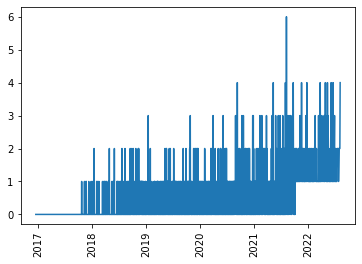

In [51]:
plt.plot(
    new_df.loc[new_df["product_id"] == 20552]["date"],
    new_df.loc[new_df["product_id"] == 20552]["sales_count"],
)
plt.xticks(rotation="vertical")

(array([16801., 17167., 17532., 17897., 18262., 18628., 18993.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

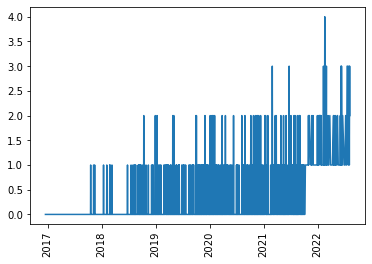

In [52]:
plt.plot(
    new_df.loc[new_df["product_id"] == 20547]["date"],
    new_df.loc[new_df["product_id"] == 20547]["sales_count"],
)
plt.xticks(rotation="vertical")

(array([16801., 17167., 17532., 17897., 18262., 18628., 18993.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

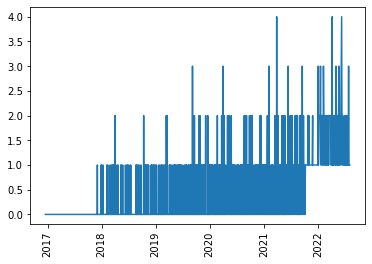

In [53]:
plt.plot(
    new_df.loc[new_df["product_id"] == 28305]["date"],
    new_df.loc[new_df["product_id"] == 28305]["sales_count"],
)
plt.xticks(rotation="vertical")

(array([16801., 17167., 17532., 17897., 18262., 18628., 18993.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

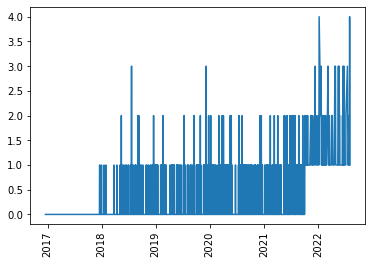

In [54]:
plt.plot(
    new_df.loc[new_df["product_id"] == 23641]["date"],
    new_df.loc[new_df["product_id"] == 23641]["sales_count"],
)
plt.xticks(rotation="vertical")

(array([16801., 17167., 17532., 17897., 18262., 18628., 18993.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

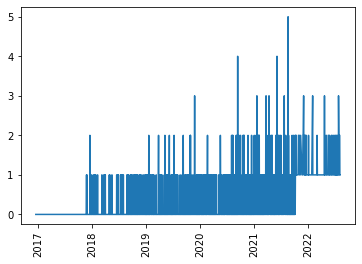

In [55]:
plt.plot(
    new_df.loc[new_df["product_id"] == 13596]["date"],
    new_df.loc[new_df["product_id"] == 13596]["sales_count"],
)
plt.xticks(rotation="vertical")

List the data types for the `new_df` dataframe.

In [56]:
new_df.dtypes

date           datetime64[ns]
product_id              int64
sales_count             int64
dtype: object

Create a new BigQuery table out of the `new_df` dataframe.

In [57]:
job_config = bigquery.LoadJobConfig(
    # Specify a (partial) schema. All columns are always written to the
    # table. The schema is used to assist in data type definitions.
    schema=[
        bigquery.SchemaField("product_id", bigquery.enums.SqlTypeNames.INTEGER),
        bigquery.SchemaField("date", bigquery.enums.SqlTypeNames.DATE),
        bigquery.SchemaField("sales_count", bigquery.enums.SqlTypeNames.INTEGER),
    ],
    # Optionally, set the write disposition. BigQuery appends loaded rows
    # to an existing table by default, but with WRITE_TRUNCATE write
    # disposition it replaces the table with the loaded data.
    write_disposition="WRITE_TRUNCATE",
)

# save the dataframe to a table in the created dataset
job = client.load_table_from_dataframe(
    new_df,
    "{}.{}.{}".format(PROJECT_ID, dataset_id, SALES_TABLE),
    job_config=job_config,
)  # Make an API request.
job.result()  # Wait for the job to complete.

LoadJob<project=vertex-ai-dev, location=US, id=1880fa6d-9d42-43b8-beb1-ada8a1a03344>

Create a training dataset by setting a date range that limits the data being used.

In [58]:
# select the date-range and item-id(top 5) for training-data and create a table for the same
TRAININGDATA_STARTDATE = "2016-12-17"
TRAININGDATA_ENDDATE = "2021-6-01"
query = """
CREATE OR REPLACE TABLE {PROJECT_ID}.{DATASET}.training_data AS (
    SELECT
        *
    FROM
        `{DATASET}.{SALES_TABLE}`
    WHERE
        date BETWEEN '{STARTDATE}' AND '{ENDDATE}'
        );
""".format(
    STARTDATE=TRAININGDATA_STARTDATE,
    ENDDATE=TRAININGDATA_ENDDATE,
    DATASET=dataset_id,
    SALES_TABLE=SALES_TABLE,
    PROJECT_ID=PROJECT_ID,
)
# execute the query (as it is a create query, there won't be any tabular output)
query_job = client.query(query)
print(query_job.result())

Select the original data for plotting.

In [59]:
df_historical = new_df[
    (new_df["date"] >= pd.to_datetime(TRAININGDATA_STARTDATE))
    & (new_df["date"] <= pd.to_datetime(TRAININGDATA_ENDDATE))
].copy()
df_historical

,date,product_id,sales_count
0,2016-12-17,20552,0
1,2016-12-18,20552,0
2,2016-12-19,20552,0
3,2016-12-20,20552,0
4,2016-12-21,20552,0
...,...,...,...
9251,2021-05-28,20547,0
9252,2021-05-29,20547,0
9253,2021-05-30,20547,0
9254,2021-05-31,20547,1


## Modeling with BigQuery and the ARIMA model
<a name="section-6"></a>

Create an ARIMA model using the training data.

#@bigquery
CREATE OR REPLACE MODEL [your-dataset-id].arima_model

OPTIONS(
  MODEL_TYPE='ARIMA',
  TIME_SERIES_TIMESTAMP_COL='date', 
  TIME_SERIES_DATA_COL='sales_count',
  TIME_SERIES_ID_COL='product_id',
  HOLIDAY_REGION='US'
    
) AS

SELECT 
    date,
    product_id,
    sales_count
FROM
  [your-dataset-id].training_data

Train the ARIMA model.

In [60]:
# Train an ARIMA model on the created dataset
query = """
CREATE OR REPLACE MODEL `{PROJECT_ID}.{DATASET}.arima_model`

OPTIONS(
  MODEL_TYPE='ARIMA',
  TIME_SERIES_TIMESTAMP_COL='date',
  TIME_SERIES_DATA_COL='sales_count',
  TIME_SERIES_ID_COL='product_id') AS

SELECT
    date,
    product_id,
    sales_count
FROM
  `{DATASET}.training_data`
""".format(
    PROJECT_ID=PROJECT_ID, DATASET=dataset_id
)
# execute the query
job = client.query(query)
job.result()

# Evaluate the model
<a name="section-7"></a>

To evaluate the trained model, get forecasts for the 90 days after the last date of the training data. In BigQuery ML, provide the number of forecast days using the `HORIZON` argument. Specify the confidence interval for the forecast using the `CONFIDENCE_LEVEL` argument.

#@bigquery dfforecast 

DECLARE HORIZON STRING DEFAULT "90";
DECLARE CONFIDENCE_LEVEL STRING DEFAULT "0.90";

EXECUTE IMMEDIATE format('''
    SELECT
      *
    FROM
      ML.FORECAST(MODEL [your-dataset-id].arima_model,
                  STRUCT(%s AS horizon,
                         %s AS confidence_level)
                 )
    ''',HORIZON,CONFIDENCE_LEVEL)

Load the data into a dataframe named `dfforecast`.

In [61]:
query = '''DECLARE HORIZON STRING DEFAULT "90"; #number of values to forecast
DECLARE CONFIDENCE_LEVEL STRING DEFAULT "0.90"; ## required confidence level

EXECUTE IMMEDIATE format("""
    SELECT
      *
    FROM
      ML.FORECAST(MODEL {dataset_id}.arima_model,
                  STRUCT(%s AS horizon,
                         %s AS confidence_level)
                 )
    """,HORIZON,CONFIDENCE_LEVEL)'''.format(
    dataset_id=dataset_id
)
job = client.query(query)
dfforecast = job.to_dataframe()

View the first few rows.

In [62]:
dfforecast.head()

,product_id,forecast_timestamp,forecast_value,standard_error,confidence_level,prediction_interval_lower_bound,prediction_interval_upper_bound,confidence_interval_lower_bound,confidence_interval_upper_bound
0,13596,2021-06-02 00:00:00+00:00,0.969759,0.034663,0.9,0.912805,1.026712,0.912805,1.026712
1,13596,2021-06-03 00:00:00+00:00,1.187734,0.036635,0.9,1.127541,1.247927,1.127541,1.247927
2,13596,2021-06-04 00:00:00+00:00,1.160429,0.046119,0.9,1.084653,1.236206,1.084653,1.236206
3,13596,2021-06-05 00:00:00+00:00,1.464286,0.048881,0.9,1.383971,1.544602,1.383971,1.544602
4,13596,2021-06-06 00:00:00+00:00,1.301718,0.051246,0.9,1.217517,1.385918,1.217517,1.385918


In [63]:
print(f"Number of rows: {dfforecast.shape[0]}")

Number of rows: 450


Clean the historical and forecasted values for plotting.

In [64]:
df_historical.sort_values(by=["product_id", "date"], inplace=True)
dfforecast.sort_values(by=["product_id", "forecast_timestamp"], inplace=True)

# Select the actual data to plot against the forecasted data
day_diff = (new_df["date"] - pd.to_datetime(TRAININGDATA_ENDDATE)).dt.days
df_actual_90d = new_df[new_df["product_id"].isin(dfforecast["product_id"].unique())][
    (day_diff > 0) & (day_diff <= 90)
].copy()
df_actual_90d.shape

(450, 3)

Plot the historical and forecast data.


Product_id :  13596


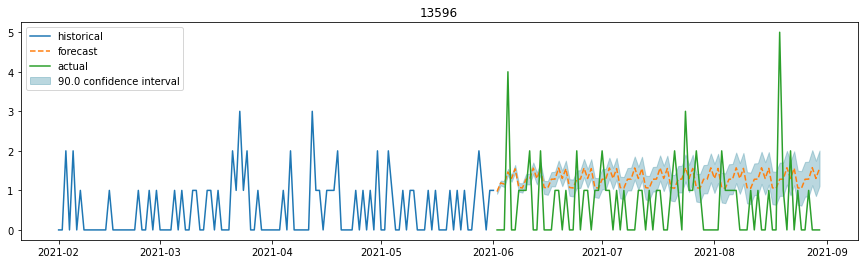

Product_id :  20547


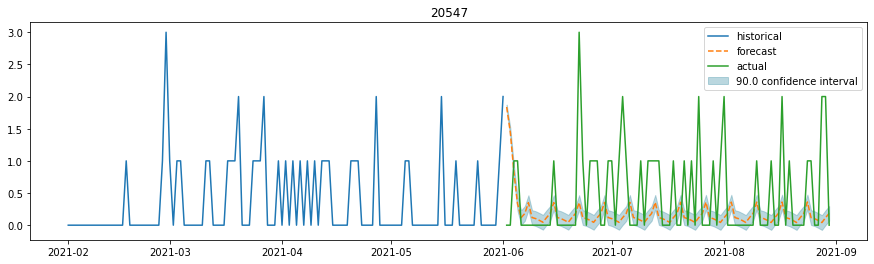

Product_id :  20552


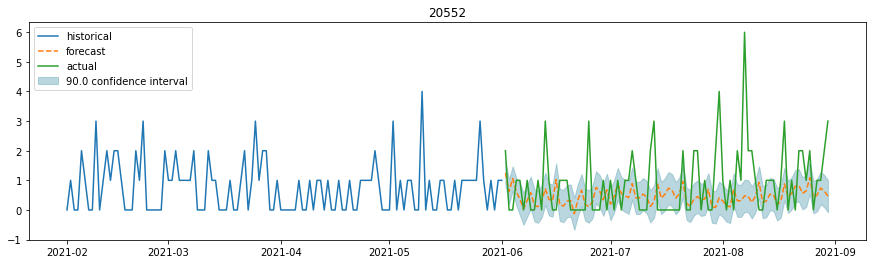

Product_id :  23641


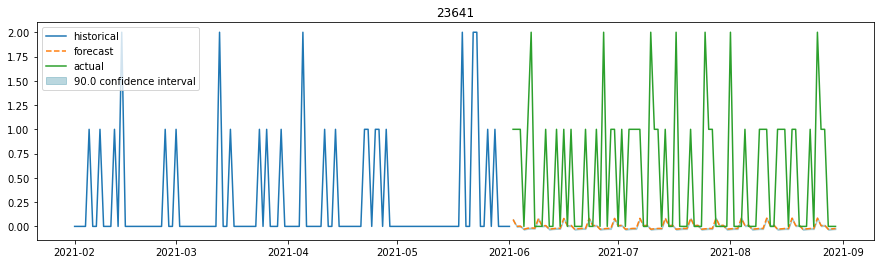

Product_id :  28305


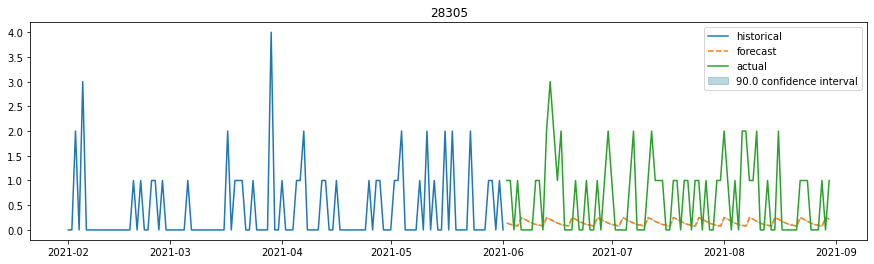

In [65]:
def plot_hist_forecast(
    historical, forecast, actual, hist_start="", hist_end="", title=""
):
    if hist_start != "":
        historical = historical[
            historical["date"] >= pd.to_datetime(hist_start, format="%Y-%m-%d")
        ].copy()
    if hist_end != "":
        historical = historical[
            historical["date"] <= pd.to_datetime(hist_end, format="%Y-%m-%d")
        ].copy()

    plt.figure(figsize=(15, 4))
    plt.plot(historical["date"], historical["sales_count"], label="historical")
    # Plot the forecast data
    plt.plot(
        forecast["forecast_timestamp"],
        forecast["forecast_value"],
        label="forecast",
        linestyle="--",
    )
    # Plot the actual data
    plt.plot(actual["date"], actual["sales_count"], label="actual")
    # plot the confidence interval
    confidence_level = forecast["confidence_level"].iloc[0] * 100
    low_CI = forecast["confidence_interval_lower_bound"]
    upper_CI = forecast["confidence_interval_upper_bound"]

    # Shade the confidence interval
    plt.fill_between(
        forecast["forecast_timestamp"],
        low_CI,
        upper_CI,
        color="#539caf",
        alpha=0.4,
        label=f"{confidence_level} confidence interval",
    )
    plt.legend()
    plt.title(title)
    plt.show()
    return


product_id_list = dfforecast["product_id"].unique()
for i in product_id_list:
    print("Product_id : ", i)
    plot_hist_forecast(
        df_historical[df_historical["product_id"] == i],
        dfforecast[dfforecast["product_id"] == i],
        df_actual_90d[df_actual_90d["product_id"] == i],
        hist_start="2021-02-01",
        title=i,
    )

While most of the predictions are looking decent, you can also see that the actual ranges fall into the 90% confidence interval suggested by the model. Under the hood, BigQuery ML performs many computationally expensive tasks even considering the seasonal and holiday information.
<img src="https://cloud.google.com/bigquery-ml/images/BQ_ARIMA_diagram.png"> <a href="https://cloud.google.com/bigquery-ml/docs/reference/standard-sql/bigqueryml-syntax-create-time-series"> Source</a> </img>

The coefficients learned by BigQuery ML's ARIMA model can also be checked by querying for <a href="https://cloud.google.com/bigquery-ml/docs/reference/standard-sql/bigqueryml-syntax-arima-coefficients">ARIMA_COEFFICIENTS</a> from the model.

#@bigquery
SELECT
  *
FROM 
  ML.ARIMA_COEFFICIENTS(MODEL [your-dataset-id].arima_model)

In [66]:
query = """
SELECT
  *
FROM 
  ML.ARIMA_COEFFICIENTS(MODEL {dataset_id}.arima_model)
""".format(
    dataset_id=dataset_id
)
query_job = client.query(query)

In [67]:
query_job.to_dataframe()

,product_id,ar_coefficients,ma_coefficients,intercept_or_drift
0,13596,[],"[-0.6579441864382871, 0.4661624653026851, -0.3...",0.000000
1,20547,[],"[1.6492699303924394, 1.8311024602768262, 1.380...",0.137364
2,20552,[],"[-0.8406836085377316, -0.2029352402929287, 0.5...",0.000340
3,23641,"[-0.06301263028572254, 0.03531834446433657, -0...",[-0.957691240545688],0.000000
4,28305,"[1.0061252293894822, -0.09062257317994371, 0.2...",[],0.153762


In the above results, 
- The <b>product_id</b> column represents the index column that we've specified while training the ARIMA model.
- The <b>ar_coefficients</b> column corresponds to the autoregressive coefficients in the ARIMA algorithm (non-seasonal p).
- <b>ma_coefficients</b> refers to the moving average coefficients in the ARIMA algorithm (non-seasonal q).
- <b>intercept_or_drift</b> is the constant term in the ARIMA algorithm.

## Evaluating the model results using BigQuery ML 
<a name="section-7-subsection-1"></a>

BigQuery ML also provides the <a href="https://cloud.google.com/bigquery-ml/docs/reference/standard-sql/bigqueryml-syntax-evaluate">ML.EVALUATE</a> function for checking the evaluation metrics of the trained model. For the ARIMA model, you can see the model being evaluated on `log_likelihood`, `AIC` and `variance`. 

#@bigquery
SELECT
  *
FROM
  ML.EVALUATE(MODEL [your-dataset-id].arima_model)

In [68]:
query = """
SELECT
  *
FROM
  ML.EVALUATE(MODEL {dataset_id}.arima_model)
""".format(
    dataset_id=dataset_id
)
query_job = client.query(query)

In [69]:
query_job.to_dataframe()

,product_id,non_seasonal_p,non_seasonal_d,non_seasonal_q,has_drift,log_likelihood,AIC,variance,seasonal_periods
0,13596,0,1,5,False,3160.389799,-6308.779598,1.201516e-03,[WEEKLY]
1,20547,0,0,4,False,3855.257814,-7698.515628,5.120331e-04,[WEEKLY]
2,20552,0,1,5,True,-44.158078,102.316156,6.129800e-02,"[WEEKLY, YEARLY]"
3,23641,4,1,1,False,6822.329345,-13632.658690,1.331273e-05,[WEEKLY]
4,28305,5,0,0,False,11891.250571,-23768.501143,1.343507e-09,[WEEKLY]


## Evaluting the model results - MAE, MAPE, MSE, RMSE (on Test data)
<a name="section-7-subsection-2"></a>

Generally, to evaluate the forecast model, you can choose metrics depending on how you want to evaluate. For starters, you can choose from the following: 
* <b>Mean Absolute Error (MAE)</b>: Average of the absolute differences between the actual values and the forecasted values.
* <b>Mean Absolute Percentage Error (MAPE)</b>: Average of the percentages of absolute difference between the actual and forecasted values to the actual values.
* <b>Mean Squared Error (MSE)</b>: Average of squared differences between the actual and forecasted values.
* <b>Root Mean Squared Error (RMSE)</b>: Root of MSE

In [70]:
df_actual_90d.sort_values(by=["product_id", "date"], inplace=True)
df_actual_90d.reset_index(drop=True, inplace=True)
dfforecast.sort_values(by=["product_id", "forecast_timestamp"], inplace=True)
dfforecast.reset_index(drop=True, inplace=True)

In [71]:
errors = {"product_id": [], "MAE": [], "MAPE": [], "MSE": [], "RMSE": []}
for i in product_id_list:
    mae = mean_absolute_error(
        df_actual_90d[df_actual_90d["product_id"] == i]["sales_count"],
        dfforecast[dfforecast["product_id"] == i]["forecast_value"],
    )
    mape = mean_absolute_percentage_error(
        df_actual_90d[df_actual_90d["product_id"] == i]["sales_count"],
        dfforecast[dfforecast["product_id"] == i]["forecast_value"],
    )

    mse = mean_squared_error(
        df_actual_90d[df_actual_90d["product_id"] == i]["sales_count"],
        dfforecast[dfforecast["product_id"] == i]["forecast_value"],
        squared=True,
    )

    rmse = mean_squared_error(
        df_actual_90d[df_actual_90d["product_id"] == i]["sales_count"],
        dfforecast[dfforecast["product_id"] == i]["forecast_value"],
        squared=False,
    )

    errors["product_id"].append(i)
    errors["MAE"].append(mae)
    errors["MAPE"].append(mape)
    errors["MSE"].append(mse)
    errors["RMSE"].append(rmse)
errors = pd.DataFrame(errors)
errors

,product_id,MAE,MAPE,MSE,RMSE
0,13596,0.918107,2.942852e+15,1.220862,1.104926
1,20547,0.511362,5.422804e+14,0.588841,0.767360
2,20552,0.863320,1.000032e+15,1.421532,1.192280
3,23641,0.554194,5.825153e+13,0.696390,0.834500
4,28305,0.647510,3.011932e+14,0.781854,0.884225


From the values obtained for these error measures, it looks like product ID 20552's 13,596's error measures are high. Note that these error measures are an aggregate of all the individual forecasts made during the test period and so reflect an overall picture of the model's performance over the selected period. Ideally, the lower these error measures, the better the model is at forecasting.

## Executor feature in managed instances
<a name="section-8"></a>

If you are using managed instances, along the top toolbar, above your notebook, click the **Executor** button.

<img src="images/navbar_exe.png" ></img>


Give the execution a name. Select the **Cloud Storage bucket**, **Machine type**, and **Accelerator type**. For the **Environment**, select **Python 3**.

<img src="images/exe_form.png" style="width:500px"></img>


<img src="images/python3_env_selection.png" style="width:500px"></img>


In the **Type** menu, you can select schedule-based recurring executions if you want to schedule the execution to run on an interval, such as one hour.

<img src="images/schedule.png" style="height:200px;"></img>


You can see the history of your executions by clicking the **Notebook Executor** button, on the left sidebar. It looks like a calendar icon.

<img src="images/side_nav.png" style="height:500px;"></img>


You can see execution history on the **Executions** tab.

<img src="images/list_execution.png" style="width:500px"></img>


You can see your active schedules on the **Schedules** tab.

<img src="images/list_schedule.png" style="width:500px"></img>


## Clean up
<a name="section-9"></a>


To clean up all Google Cloud resources used in this project, you can [delete the Google Cloud
project](https://cloud.google.com/resource-manager/docs/creating-managing-projects#shutting_down_projects) you used for the tutorial.

Otherwise, you can delete the individual resources you created in this tutorial. The following code deletes the entire dataset.


In [72]:
# Set dataset variable to the ID of the dataset to fetch.
dataset = f"{PROJECT_ID}.{dataset_id}"

# Use the delete_contents parameter to delete a dataset and its contents.
# Use the not_found_ok parameter to not receive an error if the dataset has already been deleted.
client.delete_dataset(
    dataset_id, delete_contents=True, not_found_ok=True
)  # Make an API request.

print("Deleted dataset '{}'.".format(dataset_id))

Deleted dataset 'demandforecasting_20220808064954'.
